In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [12]:
import pandas as pd
station_raw = pd.read_excel('gas_station.xls', encoding='utf-8', header=2)
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1548,1345,-
1,서울특별시,SK서광주유소,서울 강남구 역삼로 142 (역삼동),SK에너지,02-562-4855,Y,1765,1565,1365,990
2,서울특별시,현대오일뱅크㈜ 직영 도곡셀프주유소,서울특별시 강남구 남부순환로 2718 (도곡동),현대오일뱅크,02-529-5101,Y,1780,1566,1361,-
3,서울특별시,(주)정원이디에쓰 산성주유소,서울 강남구 헌릉로 730 (세곡동),GS칼텍스,02-2226-4963,Y,-,1568,1365,-
4,서울특별시,현대오일뱅크(주)유진주유소,서울 강남구 논현로 152 (도곡동),현대오일뱅크,02-3462-5215,N,1805,1586,1384,1060


In [13]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'], 
                                       '주소':station_raw['주소'],
                                       '가격':station_raw['휘발유'],
                                       '셀프':station_raw['셀프여부'],
                                       '상표':station_raw['상표']  })
stations.head()

,Oil_store,주소,가격,셀프,상표
0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1548,Y,SK에너지
1,SK서광주유소,서울 강남구 역삼로 142 (역삼동),1565,Y,SK에너지
2,현대오일뱅크㈜ 직영 도곡셀프주유소,서울특별시 강남구 남부순환로 2718 (도곡동),1566,Y,현대오일뱅크
3,(주)정원이디에쓰 산성주유소,서울 강남구 헌릉로 730 (세곡동),1568,Y,GS칼텍스
4,현대오일뱅크(주)유진주유소,서울 강남구 논현로 152 (도곡동),1586,N,현대오일뱅크


In [18]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1548,Y,SK에너지,강남구
1,SK서광주유소,서울 강남구 역삼로 142 (역삼동),1565,Y,SK에너지,강남구
2,현대오일뱅크㈜ 직영 도곡셀프주유소,서울특별시 강남구 남부순환로 2718 (도곡동),1566,Y,현대오일뱅크,강남구
3,(주)정원이디에쓰 산성주유소,서울 강남구 헌릉로 730 (세곡동),1568,Y,GS칼텍스,강남구
4,현대오일뱅크(주)유진주유소,서울 강남구 논현로 152 (도곡동),1586,N,현대오일뱅크,강남구


In [19]:
stations['구'].unique()
stations[stations['구']=='서울특별시']

,Oil_store,주소,가격,셀프,상표,구


In [20]:
stations.loc[stations['구']=='서울특별시', '구'] = '성동구'
stations['구'].unique()

array(['강남구'], dtype=object)

In [23]:
stations = stations[stations['가격'] != '-']
stations.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1548,Y,SK에너지,강남구
1,SK서광주유소,서울 강남구 역삼로 142 (역삼동),1565,Y,SK에너지,강남구
2,현대오일뱅크㈜ 직영 도곡셀프주유소,서울특별시 강남구 남부순환로 2718 (도곡동),1566,Y,현대오일뱅크,강남구
3,(주)정원이디에쓰 산성주유소,서울 강남구 헌릉로 730 (세곡동),1568,Y,GS칼텍스,강남구
4,현대오일뱅크(주)유진주유소,서울 강남구 논현로 152 (도곡동),1586,N,현대오일뱅크,강남구


In [0]:
stations['가격'] = [float(value) for value in stations['가격']]
stations.reset_index(inplace=True)
del stations['index']

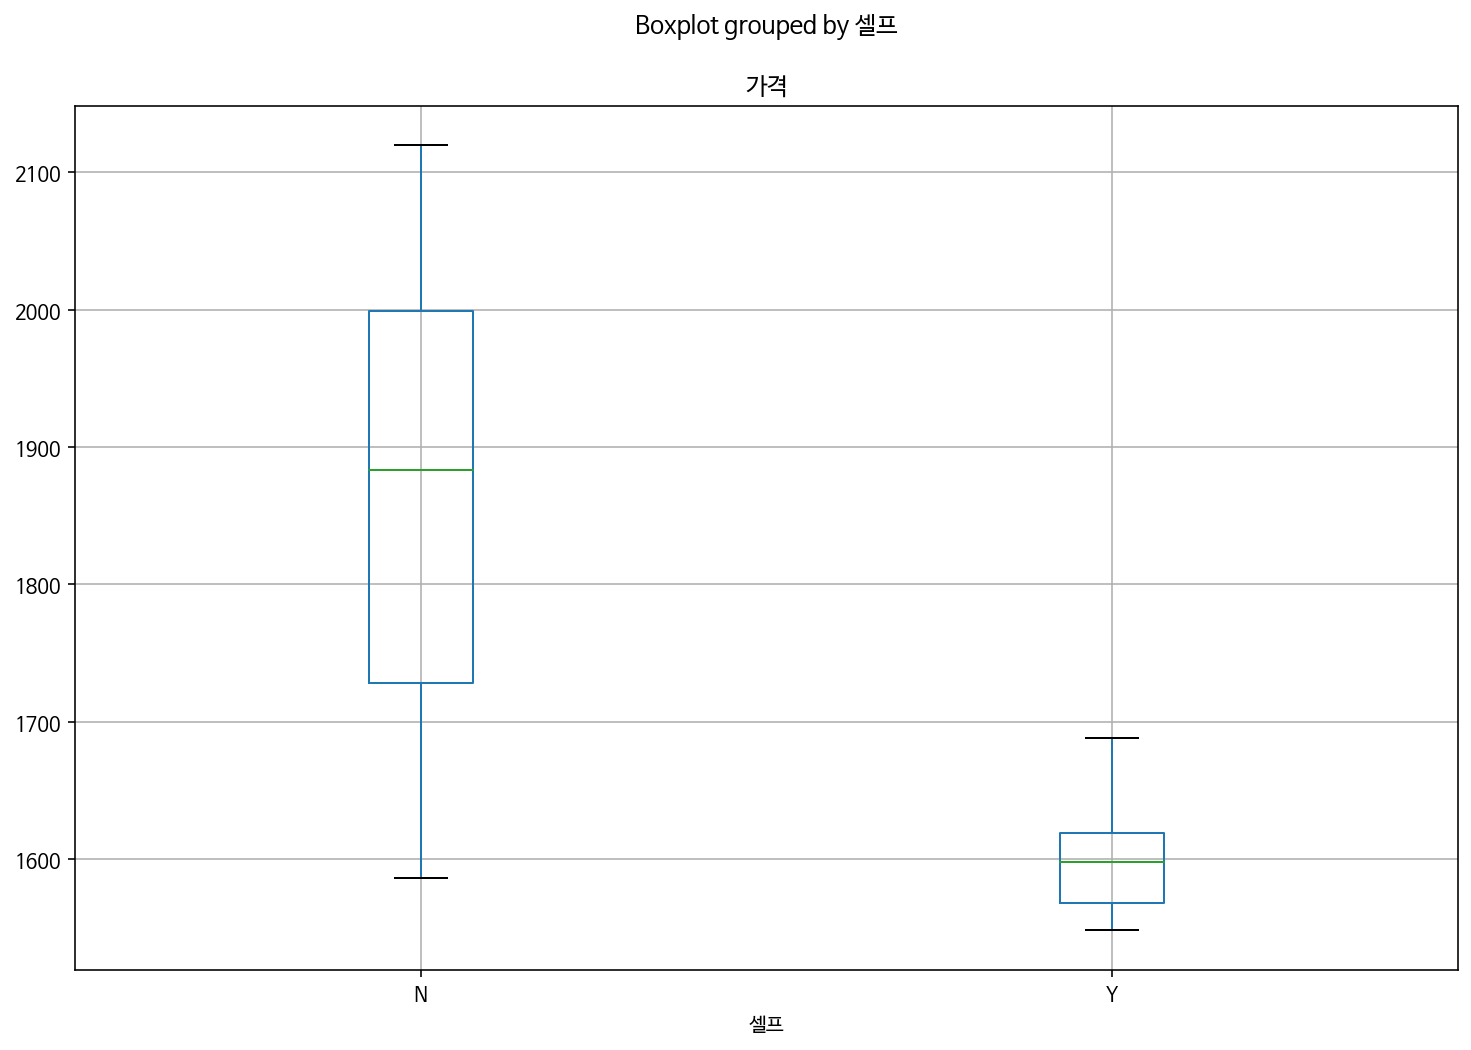

In [25]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8));

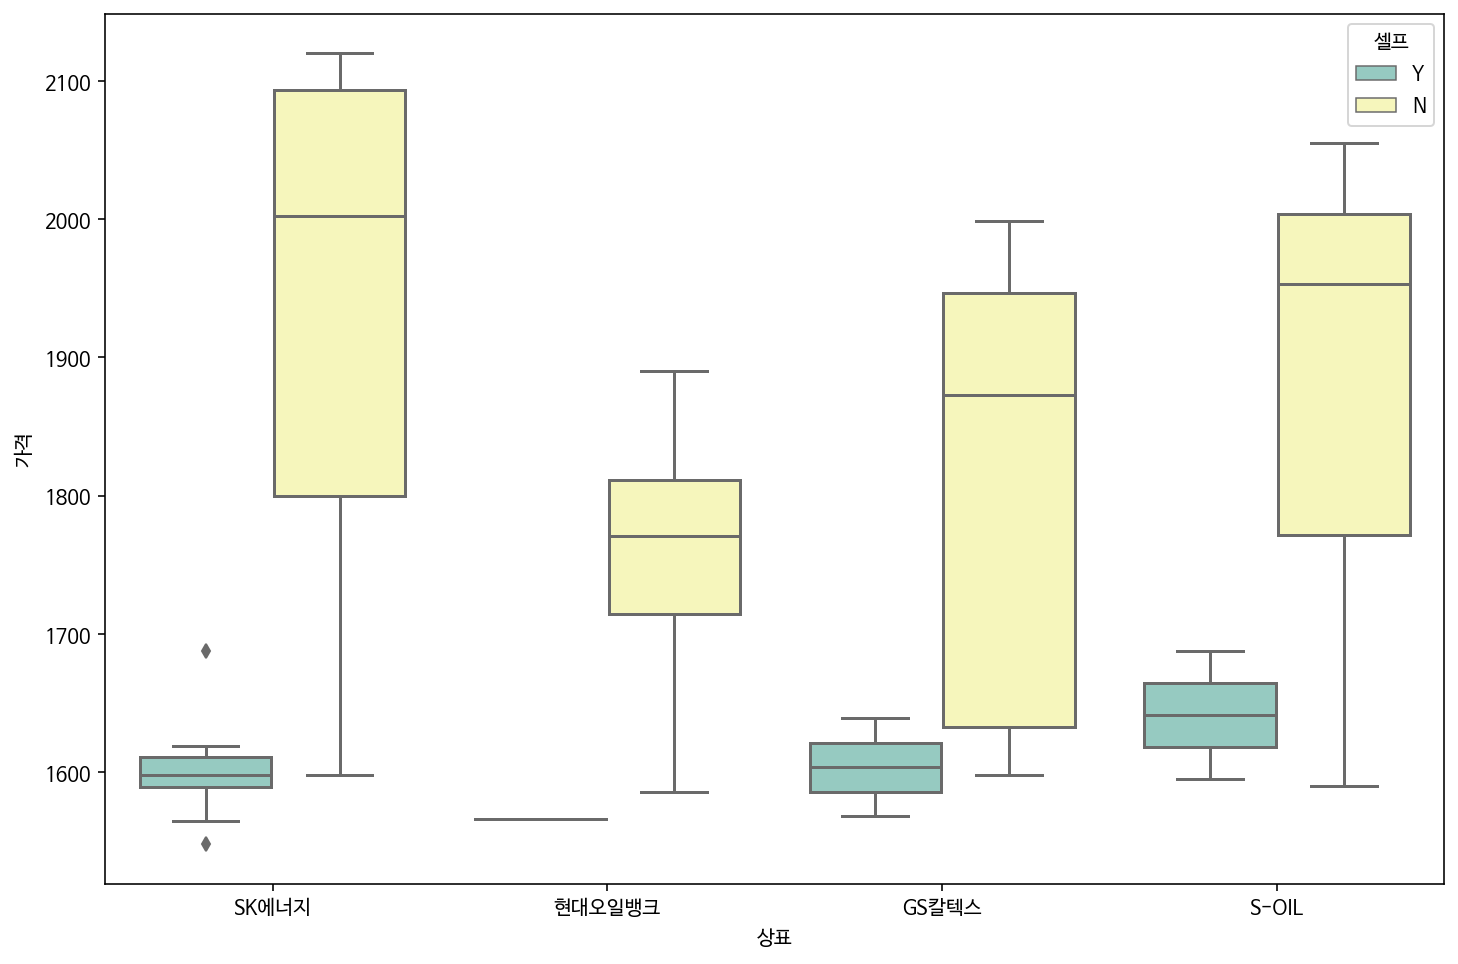

In [27]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.show()

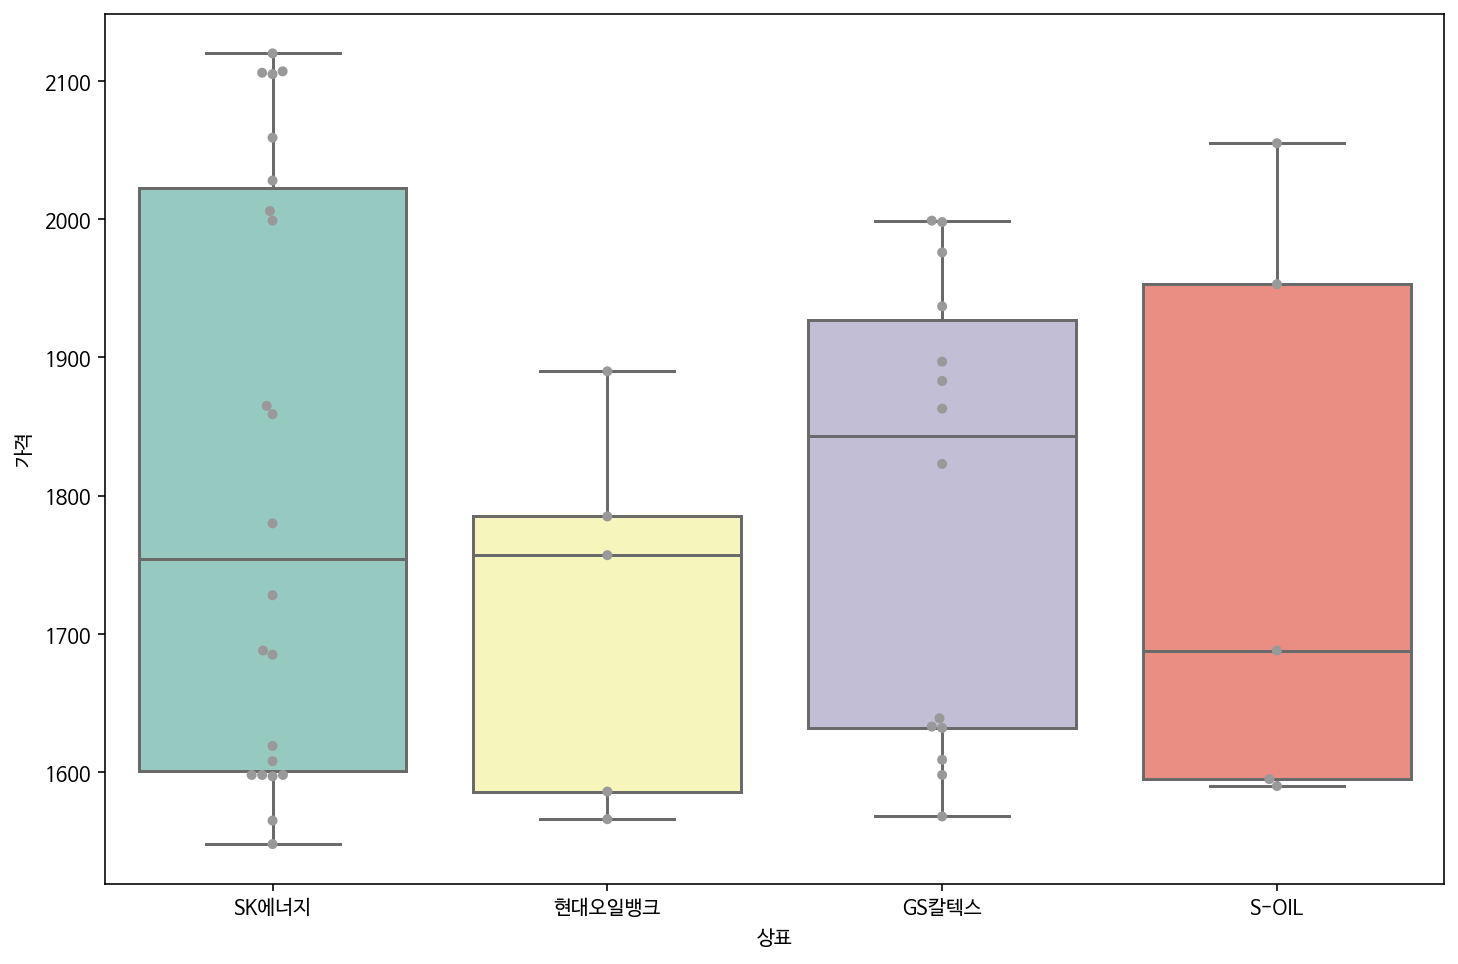

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
sns.swarmplot(x="상표", y="가격", data=stations, color=".6")
plt.show()